# Capstone Project
## Automatic Ticket Assignement
To build a classifier that can classify the tickets by analysing text.
### Dataset
Input Data Synthetic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read dataset

In [2]:
df = pd.read_excel("C:\\Users\\exsxaxr\\Downloads\\Input Data Synthetic.xlsx")

### EDA and Preprocessing

In [3]:
df['Assignment group'].value_counts(ascending=True)

GRP_73       1
GRP_35       1
GRP_61       1
GRP_67       1
GRP_64       1
          ... 
GRP_9      252
GRP_12     257
GRP_24     289
GRP_8      661
GRP_0     3975
Name: Assignment group, Length: 74, dtype: int64

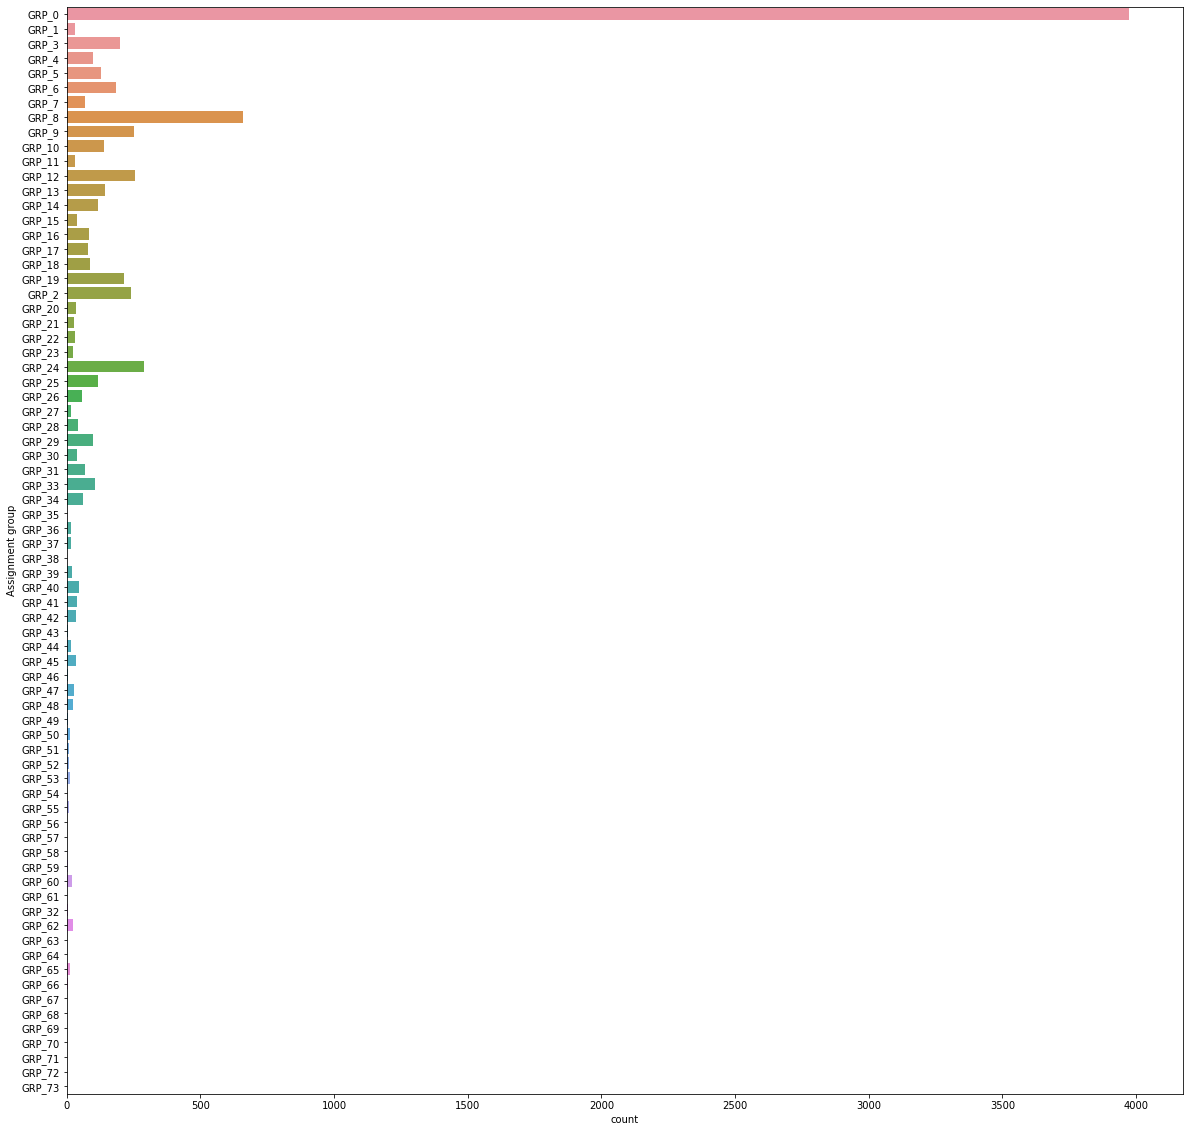

In [4]:
plt.figure(figsize=(20,20))
sns.countplot(y=df['Assignment group'])

In [5]:
# Downsample majority class


from sklearn.utils import resample

df_majority = df.loc[df['Assignment group'] == 'GRP_0']
df_minority = df.loc[df['Assignment group'] != 'GRP_0']
df_majority_downsampled = resample(df_majority, 
                        replace=False,     # sample with replacement
                        n_samples=600,    # to match majority class
                        random_state=123) # reproducible results


In [6]:
df = pd.concat([df_majority_downsampled, df_minority])

In [7]:
max_size = df['Assignment group'].value_counts().max()

lst = [df]
for class_index, group in df.groupby('Assignment group'):
    lst.append(group.sample(max_size-len(group), replace=True))
df = pd.concat(lst)

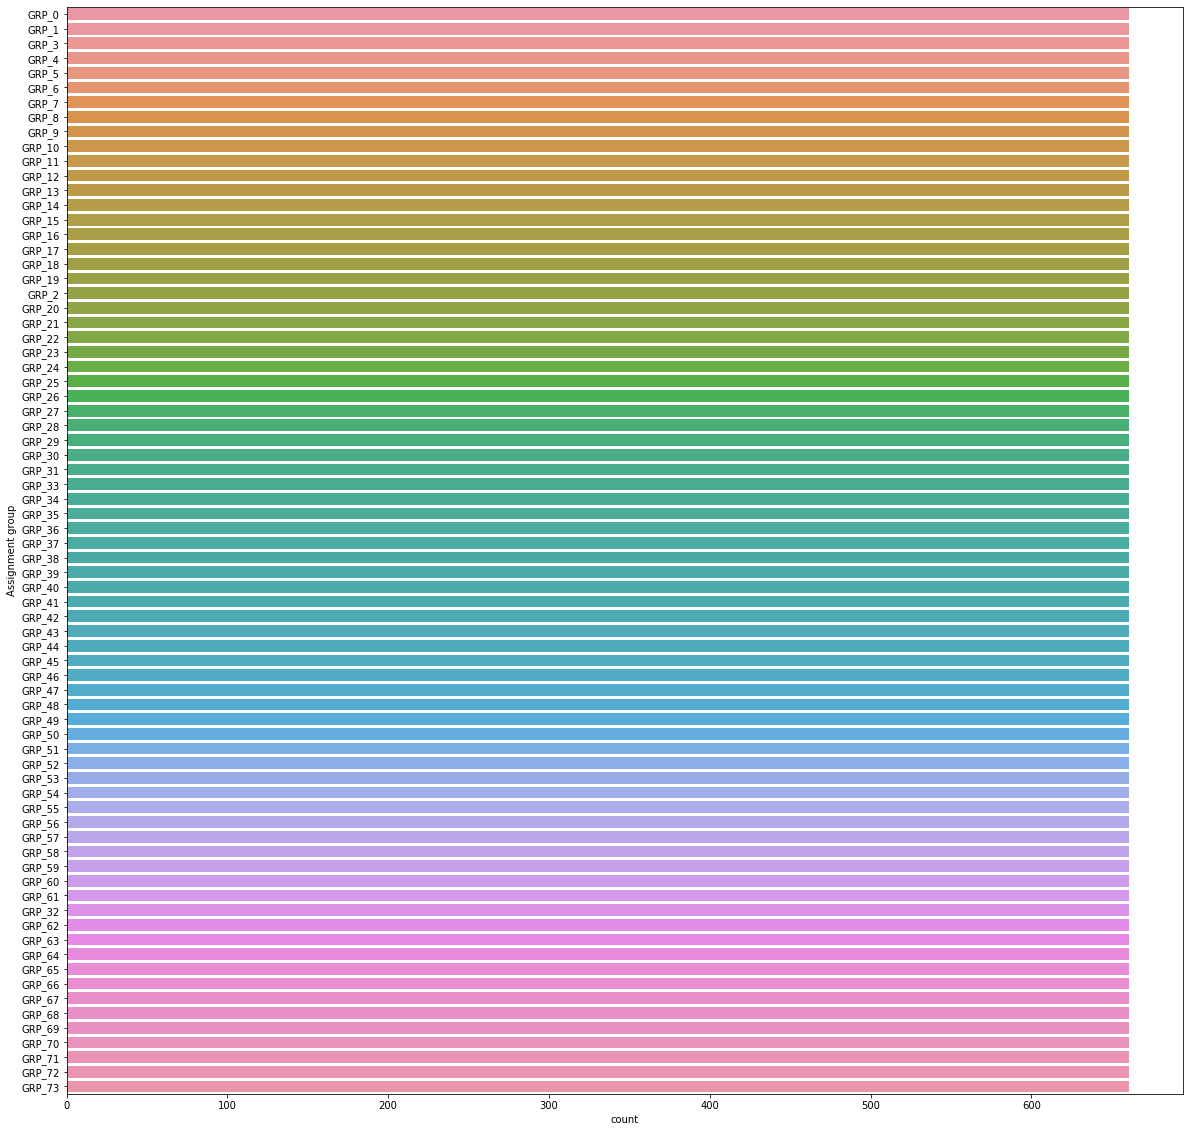

In [8]:
plt.figure(figsize=(20,20))
sns.countplot(y=df['Assignment group'])

In [9]:
# Drop irrelevant columns

df = df.drop(['Caller'], axis=1)

In [10]:
# Replace NAN with any stop word

df['Short description'].fillna('the', inplace=True)

In [11]:
# Convert categories into unique codes

df['Category'] = df['Assignment group'].astype('category').cat.codes

In [12]:
df = df.drop(['Assignment group'], axis=1)

In [13]:
df.head()

,Short description,Description,Category
1821,password reset from password_management_tool,password reset from password_management_tool,0
6436,outlook is continuously asking for password.,outlook is continuously asking for password.,0
4857,vpn,\n\nreceived from: marhty.financial@company.co...,0
497,backup on company provided mobile phone,backup on company provided mobile phone,0
3688,account locked in erp SID_34,account locked in erp SID_34,0


In [14]:
# Remove email id from description

import re
df['Description'] = df['Description'].apply((lambda x: re.sub('received from:.\S+@\S+','',x)))

In [15]:
# Remove words that are not relevant

df['Description'] = df['Description'].apply((lambda x: re.sub('hi|hello|team|thanks','',x)))

In [16]:
# Change to lowercase
df['Short description'] = df['Short description'].map(lambda x: x.lower())
df['Description'] = df['Description'].map(lambda x: x.lower())

In [17]:
df.head()

,Short description,Description,Category
1821,password reset from password_management_tool,password reset from password_management_tool,0
6436,outlook is continuously asking for password.,outlook is continuously asking for password.,0
4857,vpn,\n\n\n\n:\n\ni get the following error when i ...,0
497,backup on company provided mobile phone,backup on company provided mobile phone,0
3688,account locked in erp sid_34,account locked in erp sid_34,0


In [18]:
# Remove numbers

import re

df['Short description'] = df['Short description'].map(lambda x: re.sub(r'\d+', '', x))
df['Description'] = df['Description'].map(lambda x: re.sub(r'\d+', '', x))

In [19]:
df.head()

,Short description,Description,Category
1821,password reset from password_management_tool,password reset from password_management_tool,0
6436,outlook is continuously asking for password.,outlook is continuously asking for password.,0
4857,vpn,\n\n\n\n:\n\ni get the following error when i ...,0
497,backup on company provided mobile phone,backup on company provided mobile phone,0
3688,account locked in erp sid_,account locked in erp sid_,0


In [20]:
# Remove Punctuation

import string

df['Short description']  = df['Short description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
df['Description']  = df['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

In [21]:
df.head()

,Short description,Description,Category
1821,password reset from passwordmanagementtool,password reset from passwordmanagementtool,0
6436,outlook is continuously asking for password,outlook is continuously asking for password,0
4857,vpn,\n\n\n\n\n\ni get the following error when i t...,0
497,backup on company provided mobile phone,backup on company provided mobile phone,0
3688,account locked in erp sid,account locked in erp sid,0


In [22]:
# Remove white spaces

df['Short description'] = df['Short description'].map(lambda x: x.strip())
df['Description'] = df['Description'].map(lambda x: x.strip())

In [23]:
df.head()

,Short description,Description,Category
1821,password reset from passwordmanagementtool,password reset from passwordmanagementtool,0
6436,outlook is continuously asking for password,outlook is continuously asking for password,0
4857,vpn,i get the following error when i try to start ...,0
497,backup on company provided mobile phone,backup on company provided mobile phone,0
3688,account locked in erp sid,account locked in erp sid,0


In [24]:
df['Description'] = df['Description'].astype(str)

In [25]:
df_description = df.Description.values

In [26]:
from nltk import word_tokenize

df['Short description'] = df['Short description'].map(lambda x: word_tokenize(x))
df['Description'] = df['Description'].map(lambda x: word_tokenize(x))

In [27]:
df.head()

,Short description,Description,Category
1821,"[password, reset, from, passwordmanagementtool]","[password, reset, from, passwordmanagementtool]",0
6436,"[outlook, is, continuously, asking, for, passw...","[outlook, is, continuously, asking, for, passw...",0
4857,[vpn],"[i, get, the, following, error, when, i, try, ...",0
497,"[backup, on, company, provided, mobile, phone]","[backup, on, company, provided, mobile, phone]",0
3688,"[account, locked, in, erp, sid]","[account, locked, in, erp, sid]",0


In [28]:
# filter out stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['Short description'] = df['Short description'].map(lambda x: [w for w in x if not w in stop_words])
df['Description'] = df['Description'].map(lambda x: [w for w in x if not w in stop_words])

In [29]:
df.head()

,Short description,Description,Category
1821,"[password, reset, passwordmanagementtool]","[password, reset, passwordmanagementtool]",0
6436,"[outlook, continuously, asking, password]","[outlook, continuously, asking, password]",0
4857,[vpn],"[get, following, error, try, start, vpn, also,...",0
497,"[backup, company, provided, mobile, phone]","[backup, company, provided, mobile, phone]",0
3688,"[account, locked, erp, sid]","[account, locked, erp, sid]",0


In [30]:
# Word Lemmatization

from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
df['Short description'] = df['Short description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
df['Description'] = df['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

In [31]:
df.head()

,Short description,Description,Category
1821,"[password, reset, passwordmanagementtool]","[password, reset, passwordmanagementtool]",0
6436,"[outlook, continuously, ask, password]","[outlook, continuously, ask, password]",0
4857,[vpn],"[get, follow, error, try, start, vpn, also, tr...",0
497,"[backup, company, provide, mobile, phone]","[backup, company, provide, mobile, phone]",0
3688,"[account, lock, erp, sid]","[account, lock, erp, sid]",0


In [32]:
from wordcloud import WordCloud

val = str(df_description)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(val)

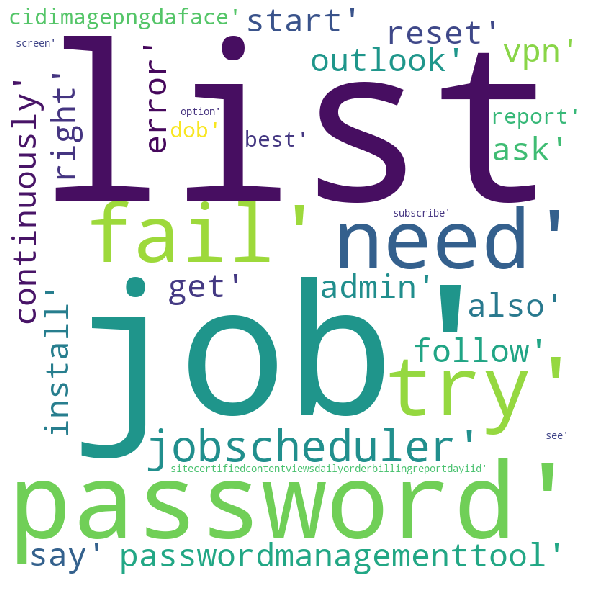

In [33]:
# plot the WordCloud image       

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [34]:
df.head()

,Short description,Description,Category
1821,"[password, reset, passwordmanagementtool]","[password, reset, passwordmanagementtool]",0
6436,"[outlook, continuously, ask, password]","[outlook, continuously, ask, password]",0
4857,[vpn],"[get, follow, error, try, start, vpn, also, tr...",0
497,"[backup, company, provide, mobile, phone]","[backup, company, provide, mobile, phone]",0
3688,"[account, lock, erp, sid]","[account, lock, erp, sid]",0


In [35]:
# Turn lists back to string

df['Short description'] = df['Short description'].map(lambda x: ' '.join(x))
df['Description'] = df['Description'].map(lambda x: ' '.join(x))

In [36]:
# Concatenate short description and description columns

df['Description'] = df['Short description'].str.cat(df['Description'], sep =" ")

In [37]:
df = df.drop(['Short description'], axis=1)

In [38]:
# Find length of the words in description

df['Desc_len'] = df['Description'].apply(lambda x: len(x.split(" ")))

In [39]:
df.head()

,Description,Category,Desc_len
1821,password reset passwordmanagementtool password...,0,6
6436,outlook continuously ask password outlook cont...,0,8
4857,vpn get follow error try start vpn also try in...,0,16
497,backup company provide mobile phone backup com...,0,10
3688,account lock erp sid account lock erp sid,0,8


In [40]:
# Find maxlen 

df['Desc_len'].max()

901

### Tokenize into words

In [41]:
import nltk
from nltk.tokenize import word_tokenize

desc = df.Description.str.cat(sep=' ')

tokens = word_tokenize(desc)

vocabulary = set(tokens)
print(len(vocabulary))

12735


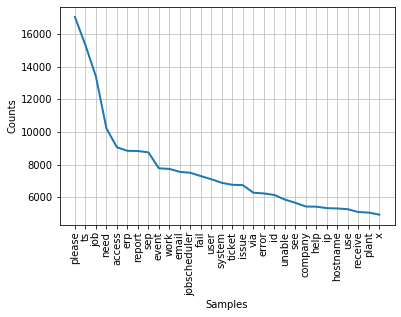

In [42]:
from nltk.probability import FreqDist

frequency_dist = nltk.FreqDist(tokens)
#sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

frequency_dist.most_common(5)

import matplotlib.pyplot as plt
frequency_dist.plot(30,cumulative=False)
plt.show()

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_features = 13000
maxlen = 900
embedding_size = 200
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Description'].values)

### Define X and Y

In [44]:
X = tokenizer.texts_to_sequences(df['Description'])
X = pad_sequences(X, maxlen = maxlen)
y = pd.get_dummies(df['Category']).values

print('Shape of data:', X.shape)
print('Shape of label:', y.shape)

Shape of data: (48914, 900)
Shape of label: (48914, 74)


In [45]:
# Splitting into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, random_state = 42)

### Word Embeddings using Glove Embedding file

In [46]:
EMBEDDING_FILE = 'C:\\Users\\exsxaxr\\Downloads\\glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

### Weight matrix

In [47]:
embedding_matrix = np.zeros((max_features, 200))

for word, i in tokenizer.word_index.items():
  if i >= max_features:
        continue
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

### Model building

In [48]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential

lstm_out = 128

# Define LSTM Model

model = Sequential()
model.add(Embedding(max_features, embedding_size, weights = [embedding_matrix]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(74, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         2600000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 200)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               120400    
_________________________________________________________________
dense (Dense)                (None, 74)                7474      
Total params: 2,727,874
Trainable params: 2,727,874
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
# Training LSTM Model

from keras.callbacks import ModelCheckpoint

epochs = 10
batch_size = 64

filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Using TensorFlow backend.


Train on 33016 samples, validate on 3669 samples
Epoch 1/10
33016/33016 [==============================] - 2577s 78ms/sample - loss: 2.1447 - accuracy: 0.5128 - val_loss: 0.9193 - val_accuracy: 0.7702
Epoch 2/10
33016/33016 [==============================] - 2723s 82ms/sample - loss: 0.7740 - accuracy: 0.8062 - val_loss: 0.4377 - val_accuracy: 0.8874
Epoch 3/10
33016/33016 [==============================] - 2744s 83ms/sample - loss: 0.4210 - accuracy: 0.8901 - val_loss: 0.2892 - val_accuracy: 0.9174
Epoch 4/10
33016/33016 [==============================] - 3903s 118ms/sample - loss: 0.2839 - accuracy: 0.9235 - val_loss: 0.2325 - val_accuracy: 0.9335
Epoch 5/10
33016/33016 [==============================] - 2835s 86ms/sample - loss: 0.2202 - accuracy: 0.9381 - val_loss: 0.2122 - val_accuracy: 0.9403
Epoch 6/10
33016/33016 [==============================] - 2755s 83ms/sample - loss: 0.1838 - accuracy: 0.9445 - val_loss: 0.1916 - val_accuracy: 0.9430
Epoch 7/10
33016/33016 [==============

### Training v/s Validation accuracy

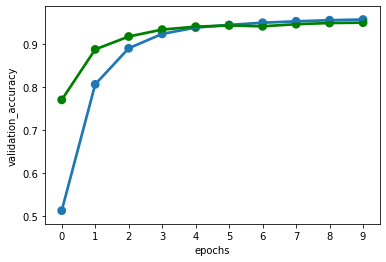

In [50]:
df_1 = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['accuracy'], 'validation_accuracy': history.history['val_accuracy']})
g = sns.pointplot(x="epochs", y="accuracy", data=df_1, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df_1, fit_reg=False, color='green')

In [57]:
predicted = model.predict(X_test)
predicted

array([[8.36744789e-07, 2.01390267e-05, 1.10768187e-05, ...,
        3.87234820e-07, 1.10732613e-03, 2.16796039e-07],
       [1.45413296e-07, 1.17571028e-08, 1.59029014e-06, ...,
        1.04990523e-08, 4.63311295e-07, 9.57466000e-07],
       [4.79769697e-05, 7.84147858e-10, 1.01581627e-05, ...,
        1.29316930e-07, 7.55919594e-09, 3.04067589e-06],
       ...,
       [2.82150438e-07, 1.59612146e-09, 2.47856113e-09, ...,
        6.31198247e-07, 5.09762954e-10, 2.37370045e-07],
       [7.12117640e-07, 4.12565441e-06, 3.79594917e-06, ...,
        2.25565386e-10, 4.19137950e-06, 7.54841221e-06],
       [1.39553331e-05, 3.22139647e-04, 4.84546386e-02, ...,
        1.16667400e-06, 1.17581114e-01, 1.95801795e-01]], dtype=float32)

In [58]:
predicted = np.argmax(predicted, axis=1)

In [59]:
Y_1 = np.argmax(Y_test, axis=1)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(Y_1, predicted))

              precision    recall  f1-score   support

           0       0.83      0.55      0.66       172
           1       0.99      0.86      0.92       162
           2       0.97      0.83      0.89       178
           3       0.99      1.00      1.00       179
           4       0.96      0.90      0.93       171
           5       0.99      0.98      0.98       178
           6       0.95      0.96      0.95       147
           7       0.99      1.00      1.00       152
           8       0.95      1.00      0.97       173
           9       1.00      1.00      1.00       152
          10       0.99      0.98      0.98       161
          11       0.94      0.90      0.92       170
          12       0.93      0.92      0.93       156
          13       0.97      1.00      0.98       147
          14       1.00      1.00      1.00       151
          15       1.00      1.00      1.00       176
          16       0.99      1.00      1.00       165
          17       0.99    